**Mushroom Classification**

Safe to eat or deadly poison?

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. 

download data: https://www.kaggle.com/uciml/mushroom-classification?select=mushrooms.csv

In [ ]:
# Load libraries
import pandas as pd
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Master_Py4DS/mushrooms.csv')
df.head()

class cap-shape cap-surface  ... spore-print-color population habitat
0     p         x           s  ...                 k          s       u
1     e         x           s  ...                 n          n       g
2     e         b           s  ...                 n          n       m
3     p         x           y  ...                 k          s       u
4     e         x           s  ...                 n          a       g

[5 rows x 23 columns]

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.columns[0:3]

Index(['class', 'cap-shape', 'cap-surface'], dtype='object')

The target label used in the dataset is class. This contains the data about whether a mushroom is edible or not. The target label is stored in another variable and is dropped from the dataframe.

In [ ]:
y=df['class']
X=df.drop('class',axis=1)
X.head()

cap-shape cap-surface cap-color  ... spore-print-color population habitat
0         x           s         n  ...                 k          s       u
1         x           s         y  ...                 n          n       g
2         b           s         w  ...                 n          n       m
3         x           y         w  ...                 k          s       u
4         x           s         g  ...                 n          a       g

[5 rows x 22 columns]

The data is categorial so It is not possible to make prediction. To convert the data to either an integer type or a float type, using **Label Encoder**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df.describe()

class cap-shape cap-surface  ... spore-print-color population habitat
count   8124      8124        8124  ...              8124       8124    8124
unique     2         6           4  ...                 9          6       7
top        e         x           y  ...                 w          v       d
freq    4208      3656        3244  ...              2388       4040    3148

[4 rows x 23 columns]

In [ ]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [ ]:
for i in df.columns:
    print(i,' : ',df[i].unique())

class  :  ['p' 'e']
cap-shape  :  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface  :  ['s' 'y' 'f' 'g']
cap-color  :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises  :  ['t' 'f']
odor  :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment  :  ['f' 'a']
gill-spacing  :  ['c' 'w']
gill-size  :  ['n' 'b']
gill-color  :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape  :  ['e' 't']
stalk-root  :  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring  :  ['s' 'f' 'k' 'y']
stalk-surface-below-ring  :  ['s' 'f' 'y' 'k']
stalk-color-above-ring  :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring  :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type  :  ['p']
veil-color  :  ['w' 'n' 'o' 'y']
ring-number  :  ['o' 't' 'n']
ring-type  :  ['p' 'e' 'l' 'f' 'n']
spore-print-color  :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population  :  ['s' 'n' 'a' 'v' 'y' 'c']
habitat  :  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [ ]:
for i in df.columns:
    print(df[i].value_counts())
    print('*'*30)

e    4208
p    3916
Name: class, dtype: int64
******************************
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
******************************
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
******************************
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
******************************
f    4748
t    3376
Name: bruises, dtype: int64
******************************
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
******************************
f    7914
a     210
Name: gill-attachment, dtype: int64
******************************
c    6812
w    1312
Name: gill-spacing, dtype: int64
******************************
b    5612
n    2512
Name: gill-size, dtype: int64
******************************
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u

In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [ ]:
df['class'].value_counts()/len(df)


e    0.517971
p    0.482029
Name: class, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [ ]:
df.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

In [ ]:
df.head()

class  cap-shape  cap-surface  ...  spore-print-color  population  habitat
0      1          5            2  ...                  2           3        5
1      0          5            2  ...                  3           2        1
2      0          0            2  ...                  3           2        3
3      1          5            3  ...                  2           3        5
4      0          5            2  ...                  3           0        1

[5 rows x 23 columns]

In [ ]:
df.describe()

class    cap-shape  ...   population      habitat
count  8124.000000  8124.000000  ...  8124.000000  8124.000000
mean      0.482029     3.348104  ...     3.644018     1.508616
std       0.499708     1.604329  ...     1.252082     1.719975
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.000000     2.000000  ...     3.000000     0.000000
50%       0.000000     3.000000  ...     4.000000     1.000000
75%       1.000000     5.000000  ...     4.000000     2.000000
max       1.000000     5.000000  ...     5.000000     6.000000

[8 rows x 23 columns]

From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data so I remove it.

In [ ]:
df=df.drop(["veil-type"],axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


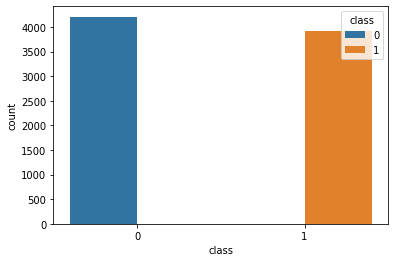

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


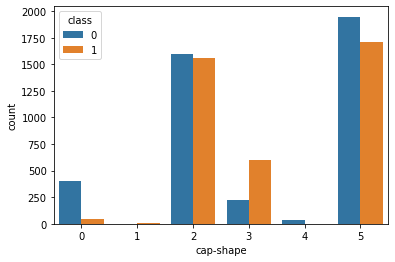

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


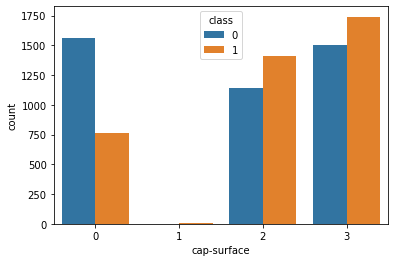

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


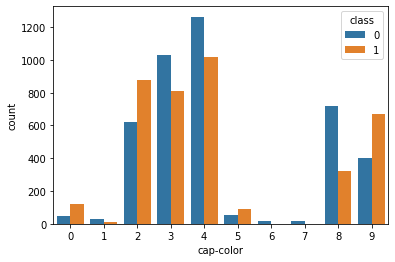

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


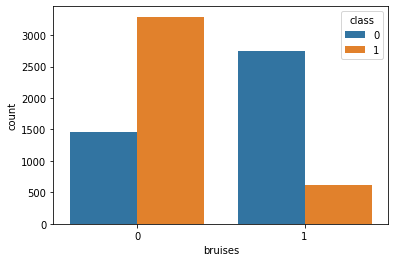

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


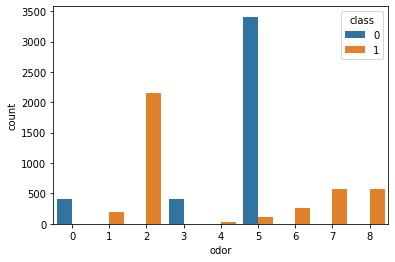

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


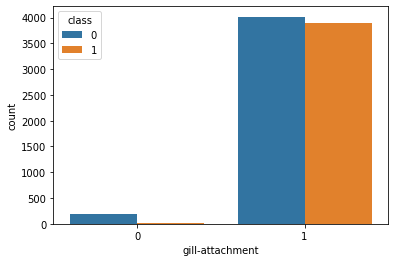

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


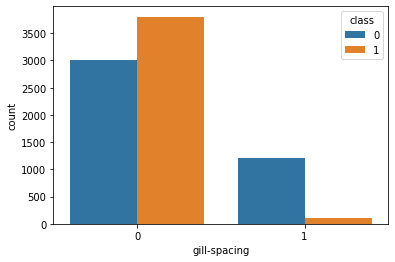

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


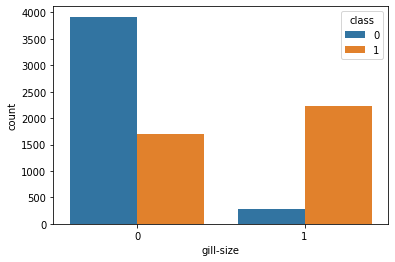

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


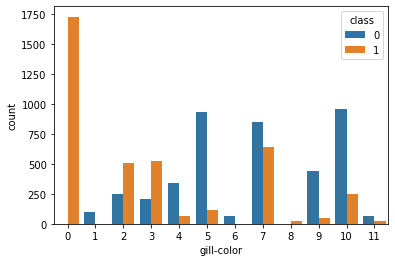

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


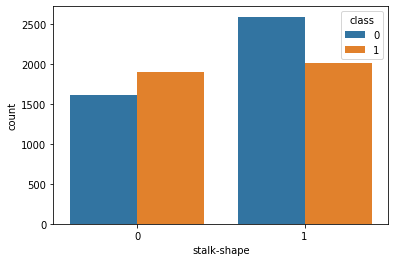

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


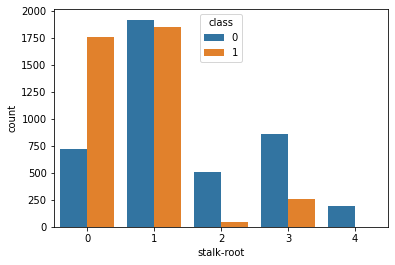

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


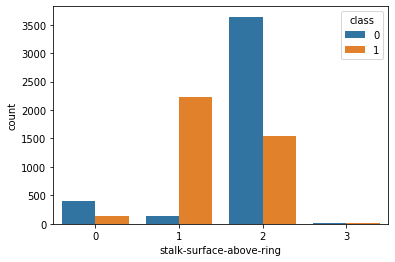

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


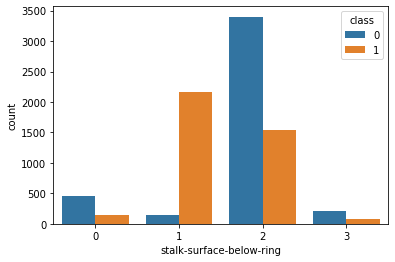

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


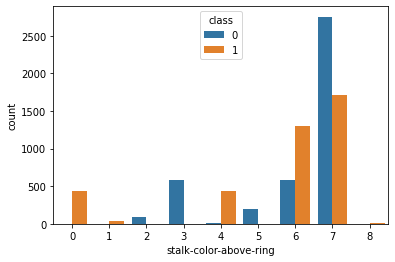

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


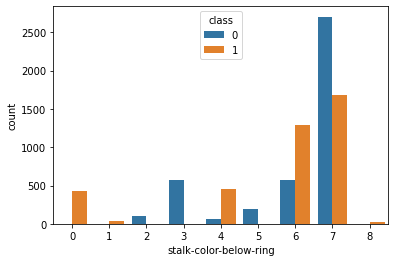

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


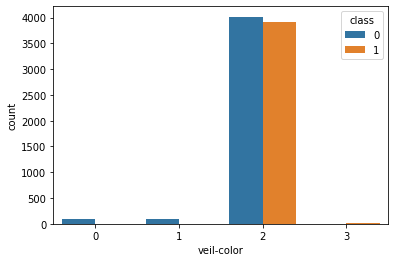

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


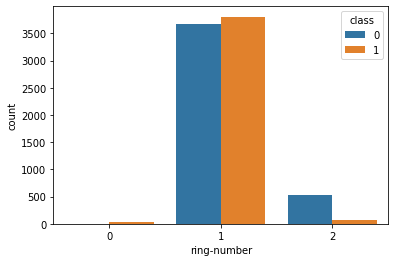

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


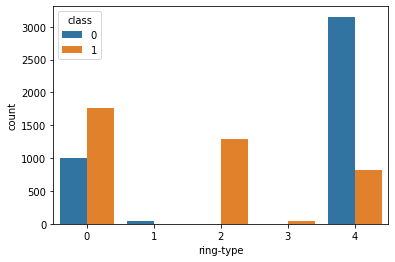

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


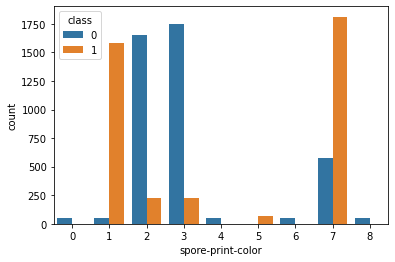

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


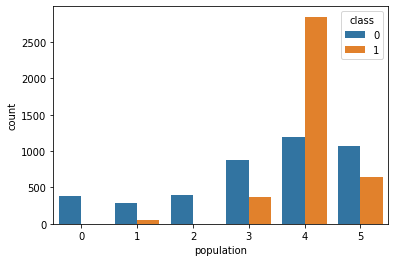

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


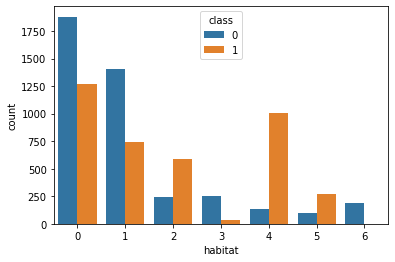

In [ ]:
import matplotlib.pyplot as plt

sns.countplot(df['ring-number'], hue=df['class'])
plt.show()

col=df.columns
for i in col:
    sns.countplot(df[i], hue=df['class'])
    plt.show()

In [ ]:
X=df.drop(['class'], axis=1)
Y=df['class']
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)

**Model, predict and estimate the result:**

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Naive Bayes
nb =  GaussianNB()
nb.fit(x_train, y_train)
y_pred=nb.predict(x_test)

print("Accuracy of naive bayees algorithm: ",nb.score(x_test,y_test))

Accuracy of naive bayees algorithm:  0.9212792127921279


In [ ]:
 from sklearn.metrics import classification_report
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       412
           1       0.92      0.92      0.92       401

    accuracy                           0.92       813
   macro avg       0.92      0.92      0.92       813
weighted avg       0.92      0.92      0.92       813



Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm=SVC(random_state=1)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
#accuracy
print("accuracy of svm algorithm: ",svm.score(x_test,y_test))

accuracy of svm algorithm:  0.991389913899139


Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#fit
lr=LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
#accuracy
print("accuracy of svm algorithm: ",lr.score(x_test,y_test))


accuracy of svm algorithm:  0.942189421894219
